In [1]:
import os
import random
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from matplotlib.ticker import FuncFormatter, MultipleLocator

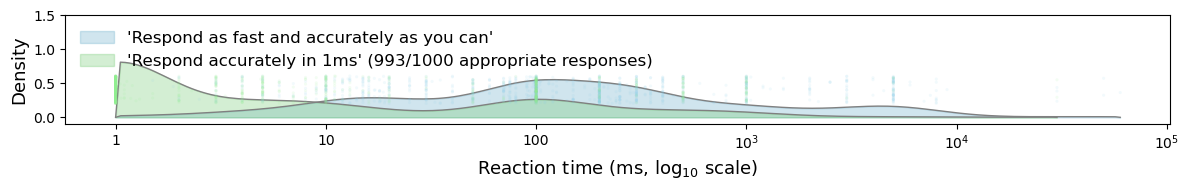

In [ ]:
# ---------------- 1.  LOAD DATA  ---------------------
with open("../data/msfree_array.pkl", "rb") as f:
    data_mf = np.asarray(pickle.load(f))

with open("./data/ms1_array.pkl", "rb") as f:
    data_m1 = np.asarray(pickle.load(f))

# -------- 2.  HELPER: log10 tick formatter -----------
def log_tick_formatter(x, pos):
    """Format ticks as 0.1, 1, 10, 100, 10^5, …"""
    exponent = int(round(x))
    if exponent in (-1, 0, 1, 2):
        return f"{10**exponent:g}"
    return rf"$10^{{{exponent}}}$"

# -------- 3.  HELPER: reproduce seaborn KDE ----------
def violin_kde(values, cut=0, gridsize=200, bw_method="scott"):
    """Return (x_grid, density) exactly as seaborn.violinplot (cut=0)."""
    values = values[np.isfinite(values)]
    kde    = gaussian_kde(values, bw_method=bw_method)

    vmin, vmax = values.min(), values.max()
    x_grid = np.linspace(vmin - cut * kde.factor,
                         vmax + cut * kde.factor,
                         gridsize)
    y = kde(x_grid)

    if cut == 0:
        m = (x_grid >= vmin) & (x_grid <= vmax)
        x_grid, y = x_grid[m], y[m]
        y[0] = y[-1] = 0          # flatten ends like seaborn
    return x_grid, y

# compute KDEs in log10 space
x_mf, y_mf = violin_kde(np.log10(data_mf), cut=0)
x_m1, y_m1 = violin_kde(np.log10(data_m1), cut=0)

# -------- 4.  JITTER FUNCTION FOR RAW DOTS -----------
rng = np.random.default_rng(seed=42)
def jitter(x, width=0.01):
    return x + rng.uniform(-width, width, size=len(x))

# -------- 5.  PLOT -----------------------------------
skyblue   = "#87CEEB"
lightgrn  = "#90EE90"
skyblue_a  = (100/255, 170/255, 200/255, 0.30)   # 30 % opacity
lightgrn_a = (110/255, 200/255, 110/255, 0.30)

fig, ax = plt.subplots(figsize=(12, 2))

# AUC shading
ax.fill_between(x_mf, 0, y_mf, color=skyblue_a,  label="'Respond as fast and accurately as you can'")
ax.fill_between(x_m1, 0, y_m1, color=lightgrn_a, label=f"'Respond accurately in 1ms' ({data_m1.size}/1000 appropriate responses)")

# KDE outlines
ax.plot(x_mf, y_mf, color='gray',  lw=1)
ax.plot(x_m1, y_m1, color='gray', lw=1)

# ─── Raw data strip *on* the baseline, jittered in Y ───────────────
peak = max(y_mf.max(), y_m1.max())

strip_center = 0.5 * peak          # baseline height (just above AUC fill)
jit_amp      = 0.25 * peak          # vertical jitter amplitude  (≈3 %)

rng = np.random.default_rng(seed=42)

# helper: vertical jitter only
def jitter_y(n, amp):
    return rng.uniform(-amp, amp, size=n)

# ms-free
ax.scatter(np.log10(data_mf),
           strip_center + jitter_y(len(data_mf), jit_amp),
           s=5, color=skyblue,  alpha=0.1, edgecolors="none", zorder=10)

# ms = 1
ax.scatter(np.log10(data_m1),
           strip_center + jitter_y(len(data_m1), jit_amp),
           s=5, color=lightgrn, alpha=0.1, edgecolors="none", zorder=11)

# axis styling
ax.set_xlabel("Reaction time (ms, log$_{10}$ scale)", fontsize=13)
ax.set_ylabel("Density", fontsize=13)
ax.xaxis.set_major_formatter(FuncFormatter(log_tick_formatter))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.set_ylim(-0.1, None)
ax.legend(frameon=False, loc="upper left", fontsize=12)
ax.set_yticks([0, 0.5, 1.0,1.5])
# ax.set_xlim(-0.1, 1e4)
# sns.despine(ax=ax, left=True)

plt.tight_layout()
# plt.savefig("ms_RT_kde_auc.svg", dpi=300)

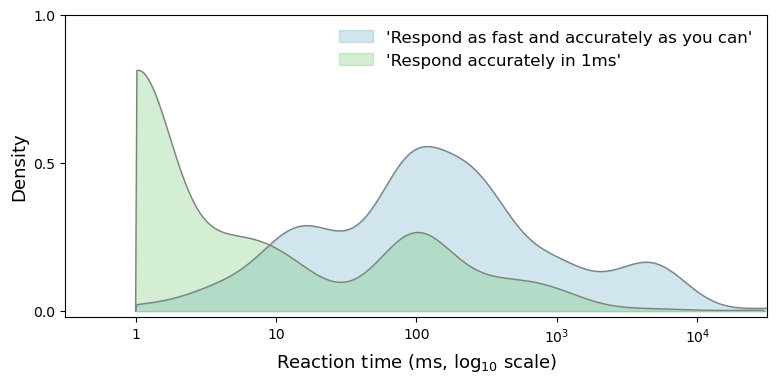

In [7]:
# ---------------- 1.  LOAD DATA  ---------------------
with open("msfree_array.pkl", "rb") as f:
    data_mf = np.asarray(pickle.load(f))

with open("ms1_array.pkl", "rb") as f:
    data_m1 = np.asarray(pickle.load(f))

# -------- 2.  HELPER: log10 tick formatter -----------
def log_tick_formatter(x, pos):
    """Format ticks as 0.1, 1, 10, 100, 10^5, …"""
    exponent = int(round(x))
    if exponent in (-1, 0, 1, 2):
        return f"{10**exponent:g}"
    return rf"$10^{{{exponent}}}$"

# -------- 3.  HELPER: reproduce seaborn KDE ----------
def violin_kde(values, cut=0, gridsize=500, bw_method="scott"):
    """Return (x_grid, density) exactly as seaborn.violinplot (cut=0)."""
    values = values[np.isfinite(values)]
    kde    = gaussian_kde(values, bw_method=bw_method)

    vmin, vmax = values.min(), values.max()
    x_grid = np.linspace(vmin - cut * kde.factor,
                         vmax + cut * kde.factor,
                         gridsize)
    y = kde(x_grid)

    if cut == 0:
        m = (x_grid >= vmin) & (x_grid <= vmax)
        x_grid, y = x_grid[m], y[m]
        y[0] = y[-1] = 0          # flatten ends like seaborn
    return x_grid, y

# compute KDEs in log10 space
x_mf, y_mf = violin_kde(np.log10(data_mf), cut=0)
x_m1, y_m1 = violin_kde(np.log10(data_m1), cut=0)

# -------- 4.  JITTER FUNCTION FOR RAW DOTS -----------
rng = np.random.default_rng(seed=42)
def jitter(x, width=0.01):
    return x + rng.uniform(-width, width, size=len(x))

# -------- 5.  PLOT -----------------------------------
skyblue   = "#87CEEB"
lightgrn  = "#90EE90"
skyblue_a  = (100/255, 170/255, 200/255, 0.30)   # 30 % opacity
lightgrn_a = (110/255, 200/255, 110/255, 0.30)

fig, ax = plt.subplots(figsize=(12, 2))

# AUC shading
ax.fill_between(x_mf, 0, y_mf, color=skyblue_a,  label="'Respond as fast and accurately as you can'")
ax.fill_between(x_m1, 0, y_m1, color=lightgrn_a, label="'Respond accurately in 1ms'")

# KDE outlines
ax.plot(x_mf, y_mf, color='gray',  lw=1)
ax.plot(x_m1, y_m1, color='gray', lw=1)

# axis styling
ax.set_xlabel("Reaction time (ms, log$_{10}$ scale)", fontsize=13)
ax.set_ylabel("Density", fontsize=13)
ax.xaxis.set_major_formatter(FuncFormatter(log_tick_formatter))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.set_ylim(-0.02, None)           # leave room for the strip
ax.set_xlim(-.5,4.5)
ax.legend(frameon=False, loc="upper right", fontsize=12)
ax.set_yticks([0, 0.5, 1.0])
# sns.despine(ax=ax, left=True)
fig.set_size_inches(20/2.54, 10/2.54)   # width, height
plt.tight_layout()
plt.savefig("ms_RT_kde_auc.svg", dpi=300)
# plt.show()        # uncomment if running interactively